### a) 

Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
movies = "../data/ml-latest/movies.csv"
rating = "../data/ml-latest/ratings.csv"

df_movies = pd.read_csv(movies)
df_rating = pd.read_csv(rating)
print(df_rating.head())
print(df_movies.head())

   userId  movieId  rating   timestamp
0       1        1     4.0  1225734739
1       1      110     4.0  1225865086
2       1      158     4.0  1225733503
3       1      260     4.5  1225735204
4       1      356     5.0  1225735119
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


Kontrollerar om det finns några NaN i dataseten. Vilket det inte gör.

In [3]:
df_movies.isna().any().any()

False

In [4]:
df_rating.isna().any().any()

False

Kollar skalan för rating.

In [5]:
df_rating["rating"].describe()

count    3.383216e+07
mean     3.542540e+00
std      1.063959e+00
min      5.000000e-01
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Visar fördelningen av ratings i datasetet.

<Axes: >

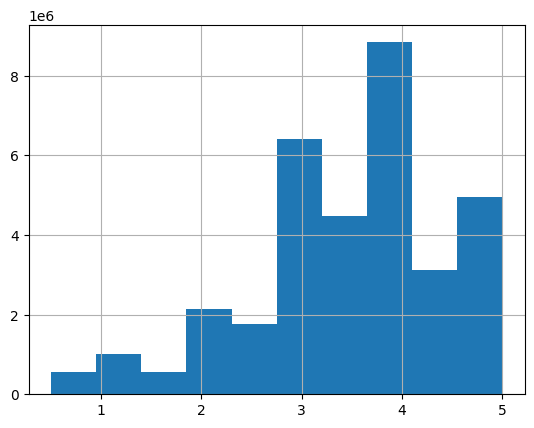

In [6]:
df_rating['rating'].hist() # creates a histogram over the ratings.


- df_movies beskriver 86,537 filmer. Filmerna har id (movieId) och titel(title). (genres) är en lista över genrer. 
- df_rating innehåller 33,832,162 betyg från användare. (userID) är vem som gett betyget. (movieID) är vilken film det gäller. (rating) är betyget på en skala (0.5-5). (timestamp) är när betyget sattes.

In [7]:
print(df_movies.info())
print(df_rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB
None


Nedan kod ger en överblick över datasetens storlek och omfång. 

In [8]:
print(df_rating.describe())
print(df_movies.describe())


             userId       movieId        rating     timestamp
count  3.383216e+07  3.383216e+07  3.383216e+07  3.383216e+07
mean   1.654380e+05  2.831348e+04  3.542540e+00  1.269362e+09
std    9.534122e+04  4.992865e+04  1.063959e+00  2.541023e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    8.295300e+04  1.219000e+03  3.000000e+00  1.046718e+09
50%    1.661290e+05  3.263000e+03  4.000000e+00  1.264740e+09
75%    2.474500e+05  4.049100e+04  4.000000e+00  1.496919e+09
max    3.309750e+05  2.889830e+05  5.000000e+00  1.689843e+09
             movieId
count   86537.000000
mean   155932.817096
std     78037.145347
min         1.000000
25%    111443.000000
50%    164574.000000
75%    211225.000000
max    288983.000000


-------

### b)

b) Vilka är de 10 filmerna med flest ratings?



In [9]:

# count the numbers of ratin for each movie
rating_counts = df_rating['movieId'].value_counts().head(10)

# get the titles 
ten_top_movies = df_movies[df_movies['movieId'].isin(rating_counts.index)].set_index('movieId')

# shows the top 10 movies with the most rating
ten_top_movies['rating_count'] = rating_counts
ten_top_movies = ten_top_movies.sort_values(by='rating_count', ascending=False)
ten_top_movies


,title,genres,rating_count
movieId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,122296
356,Forrest Gump (1994),Comedy|Drama|Romance|War,113581
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,108756
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,107056
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,101802
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,97202
2959,Fight Club (1999),Action|Crime|Drama|Thriller,86207
527,Schindler's List (1993),Drama|War,84232
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,83026


-----

### c)

c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.


In [10]:
# calculate the average raing of the ten_top_movies
average_ratings = df_rating[df_rating['movieId'].isin(rating_counts.index)].groupby('movieId')['rating'].mean()

# add the average rating to ten_top_movies
ten_top_movies['average_rating'] = average_ratings
ten_top_movies



,title,genres,rating_count,average_rating
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,122296,4.416792
356,Forrest Gump (1994),Comedy|Drama|Romance|War,113581,4.068189
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,108756,4.191778
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,107056,4.160631
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,101802,4.150287
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,97202,4.092400
2959,Fight Club (1999),Action|Crime|Drama|Thriller,86207,4.236019
527,Schindler's List (1993),Drama|War,84232,4.242337
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,83026,3.689013


------


### d)

d) Gör en plot över årtal och antalet filmer representerade i datasetet


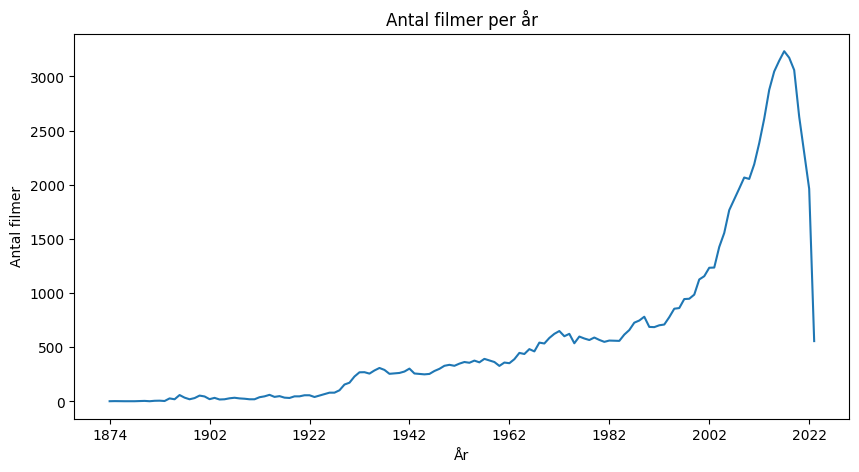

In [11]:
# Extract years from title and create a new column 'year'
df_movies['year'] = df_movies['title'].str.extract(r'(\(\d{4}\))').astype(str)
df_movies['year'] = df_movies['year'].str.extract('(\d{4})')

# calculate number of movies/year
movies_per_year = df_movies['year'].value_counts().sort_index()


plt.figure(figsize=(10, 5))
movies_per_year.plot(kind='line')
plt.title('Antal filmer per år')
plt.xlabel('År')
plt.ylabel('Antal filmer')
plt.show()



### e)

e) Gör en plot över antalet ratings mot movieId